# Import all required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdtes
import seaborn as sns
import numpy as np

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display plots inline
%matplotlib inline

# Load your NGX stock data

In [ ]:
file_path = "/Users/Mikail/Desktop/Projects/Pandas_Demo/stock_price_visualization/data/NSE All Share Historical Data (2).csv"

try:
    df = pd.read_csv(file_path)
    print("✅ Data loaded successfully!")
    print(f"📊 Dataset shape: {df.shape}")
    print("\n📋 First 5 rows:")
    display(df.head())

except FileNotFoundError:
    print("❌ File not found! Please check your file path.")
    print("💡 Make sure the CSV file is in the same folder as your notebook")

✅ Data loaded successfully!
📊 Dataset shape: (2948, 7)

📋 First 5 rows:


,Date,Price,Open,High,Low,Vol.,Change %
0,22/12/2023,"74,023.27","74,288.88","74,430.47","73,993.49",423.20M,-0.36%
1,21/12/2023,"74,289.02","73,397.71","74,292.76","73,397.71",760.93M,1.21%
2,20/12/2023,"73,397.71","72,470.10","73,399.61","72,470.10",552.22M,1.28%
3,19/12/2023,"72,470.10","72,404.91","72,489.21","72,320.32",411.06M,0.09%
4,18/12/2023,"72,404.91","72,389.23","72,413.13","72,276.75",324.15M,0.02%


 # Data Cleaning and Preparation


In [ ]:
# Enhanced data cleaning and preparation
print("🧹 Cleaning data...")

# Create a copy of the dataframe
df_clean = df.copy()

# Convert Date column from DD/MM/YYYY to datetime
df_clean["Date"] = pd.to_datetime(df_clean["Date"], format="%d/%m/%Y")

# Sort by date (oldest to newest)
df_clean = df_clean.sort_values("Date")

#  Clean numeric columns (Open, High, Low, Price)
print("🔧 Cleaning numeric columns...")
cols = ["Open", "High", "Low", "Price"]

for c in cols:
    if c in df_clean.columns:
        df_clean[c] = (
            df_clean[c]
            .astype(str)
            .str.replace(",", "", regex=False)
            .str.replace(" ", "", regex=False)
            .str.replace("%", "", regex=False)
        )
        df_clean[c] = pd.to_numeric(df_clean[c], errors="coerce")
        print(f"   ✅ Cleaned column: {c}")

# Clean the Volume column if it exists
if "Vol." in df_clean.columns:
    df_clean["Volume"] = (
        df_clean["Vol."]
        .astype(str)
        .str.replace(",", "")
        .str.replace("K", "e3")
        .str.replace("M", "e6")
        .str.replace("B", "e9")
        .astype(float)
    )
    print("   ✅ Cleaned column: Volume")

# Clean the Change % column if it exists
if "Change %" in df_clean.columns:
    df_clean["Change_Pct"] = df_clean["Change %"].str.replace("%", "").astype(float)
    print("   ✅ Cleaned column: Change %")

print("✅ Data cleaning completed!")
print(
    f"📅 Date range: {df_clean['Date'].min().strftime('%Y-%m-%d')} to {df_clean['Date'].max().strftime('%Y-%m-%d')}"
)
print(f"📈 Number of trading days: {len(df_clean)}")

# Display data types and basic info
print("\n📊 Data types after cleaning:")
print(df_clean.dtypes)

# Display cleaned data
print("\n📋 First 5 rows of cleaned data:")
display(df_clean.head())

🧹 Cleaning data...
🔧 Cleaning numeric columns...
   ✅ Cleaned column: Open
   ✅ Cleaned column: High
   ✅ Cleaned column: Low
   ✅ Cleaned column: Price
   ✅ Cleaned column: Volume
   ✅ Cleaned column: Change %
✅ Data cleaning completed!
📅 Date range: 2012-01-30 to 2023-12-22
📈 Number of trading days: 2948

📊 Data types after cleaning:
Date          datetime64[ns]
Price                float64
Open                 float64
High                 float64
Low                  float64
Vol.                  object
Change %              object
Volume               float64
Change_Pct           float64
dtype: object

📋 First 5 rows of cleaned data:


,Date,Price,Open,High,Low,Vol.,Change %,Volume,Change_Pct
2947,2012-01-30,20731.72,20939.10,20950.02,20731.72,NaN,-0.77%,NaN,-0.77
2946,2012-01-31,20875.83,20818.56,21009.92,20789.48,NaN,0.70%,NaN,0.70
2945,2012-02-01,20790.88,20875.34,20941.03,20790.88,NaN,-0.41%,NaN,-0.41
2944,2012-02-02,20822.00,20872.94,20900.58,20785.40,NaN,0.15%,NaN,0.15
2943,2012-02-03,20877.64,20822.00,20863.93,20786.35,NaN,0.27%,NaN,0.27


# Create Basic Time-Series Line Chart

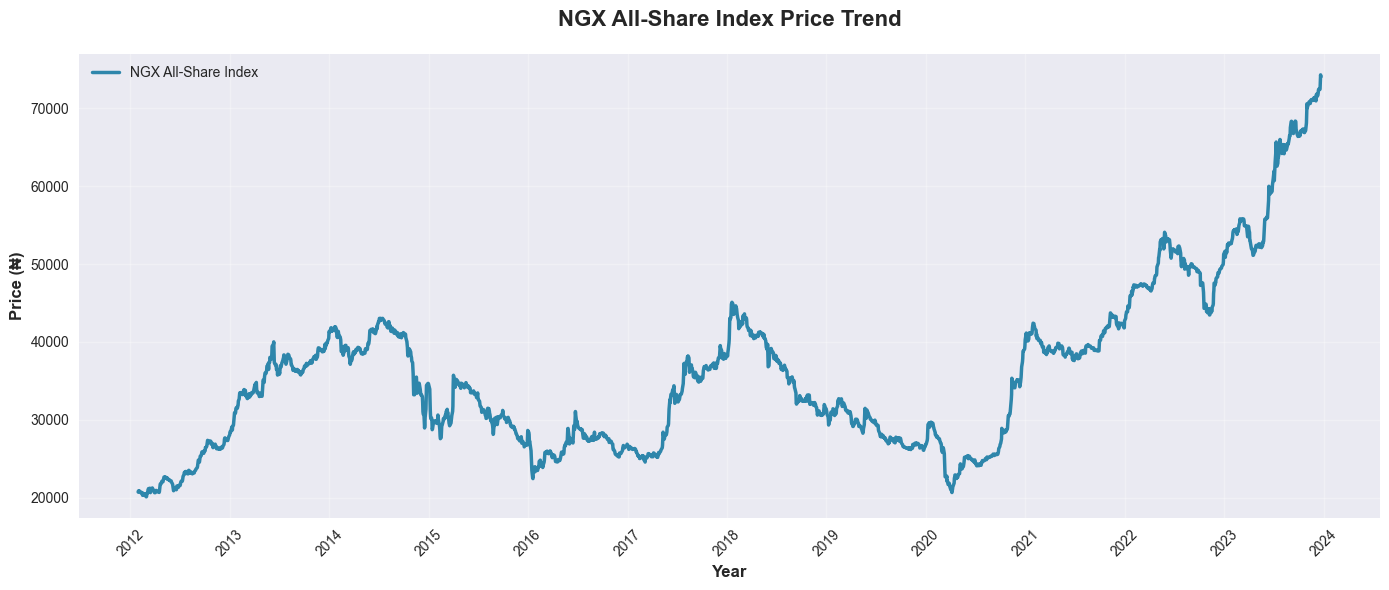

📈 Basic price chart created!


In [ ]:
# Create a simple time-series line chart
plt.figure(figsize=(14, 6))

# Plot the price line
plt.plot(
    df_clean["Date"],
    df_clean["Price"],
    linewidth=2.5,
    color="#2E86AB",
    label="NGX All-Share Index",
)

# Customize the chart
plt.title("NGX All-Share Index Price Trend", fontsize=16, fontweight="bold", pad=20)

plt.xlabel("Year", fontsize=12, fontweight="bold")
plt.ylabel("Price (₦)", fontsize=12, fontweight="bold")

# Add grid and legend
plt.grid(True, alpha=0.3)
plt.legend()

# Format x-axis to show years
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("📈 Basic price chart created!")

# Basic Statistical Summary

In [ ]:
# Generate basic statistical summary
print("=" * 60)
print("📊 BASIC STATISTICAL SUMMARY - NGX ALL-SHARE INDEX")
print("=" * 60)

# Price Statistics
print("\n📈 PRICE STATISTICS:")
print(
    f"   • Period: {df_clean['Date'].min().strftime('%d %b %Y')} to {df_clean['Date'].max().strftime('%d %b %Y')}"
)
print(f"   • Trading Days: {len(df_clean):,}")
print(f"   • First Price: ₦{df_clean['Price'].iloc[0]:,.2f}")
print(f"   • Last Price: ₦{df_clean['Price'].iloc[-1]:,.2f}")
print(f"   • Highest Price: ₦{df_clean['Price'].max():,.2f}")
print(f"   • Lowest Price: ₦{df_clean['Price'].min():,.2f}")
print(f"   • Average Price: ₦{df_clean['Price'].mean():,.2f}")

# Calculate returns
total_return = ((df_clean["Price"].iloc[-1] / df_clean["Price"].iloc[0]) - 1) * 100
print(f"\n📊 RETURN STATISTICS:")
print(f"   • Total Return: {total_return:+.2f}%")

# If we have percentage change data
if "Change_Pct" in df_clean.columns:
    positive_days = (df_clean["Change_Pct"] > 0).sum()
    negative_days = (df_clean["Change_Pct"] < 0).sum()

    print(
        f"   • Positive Days: {positive_days} ({positive_days/len(df_clean)*100:.1f}%)"
    )
    print(
        f"   • Negative Days: {negative_days} ({negative_days/len(df_clean)*100:.1f}%)"
    )
    print(f"   • Best Day: +{df_clean['Change_Pct'].max():.2f}%")
    print(f"   • Worst Day: {df_clean['Change_Pct'].min():.2f}%")

print("\n" + "=" * 60)

📊 BASIC STATISTICAL SUMMARY - NGX ALL-SHARE INDEX

📈 PRICE STATISTICS:
   • Period: 30 Jan 2012 to 22 Dec 2023
   • Trading Days: 2,948
   • First Price: ₦20,731.72
   • Last Price: ₦74,023.27
   • Highest Price: ₦74,289.02
   • Lowest Price: ₦20,123.51
   • Average Price: ₦35,927.63

📊 RETURN STATISTICS:
   • Total Return: +257.05%
   • Positive Days: 1485 (50.4%)
   • Negative Days: 1435 (48.7%)
   • Best Day: +8.31%
   • Worst Day: -4.91%



# Enhanced Analysis with Moving Averages

🔧 Adding technical indicators...
✅ Technical indicators calculated!


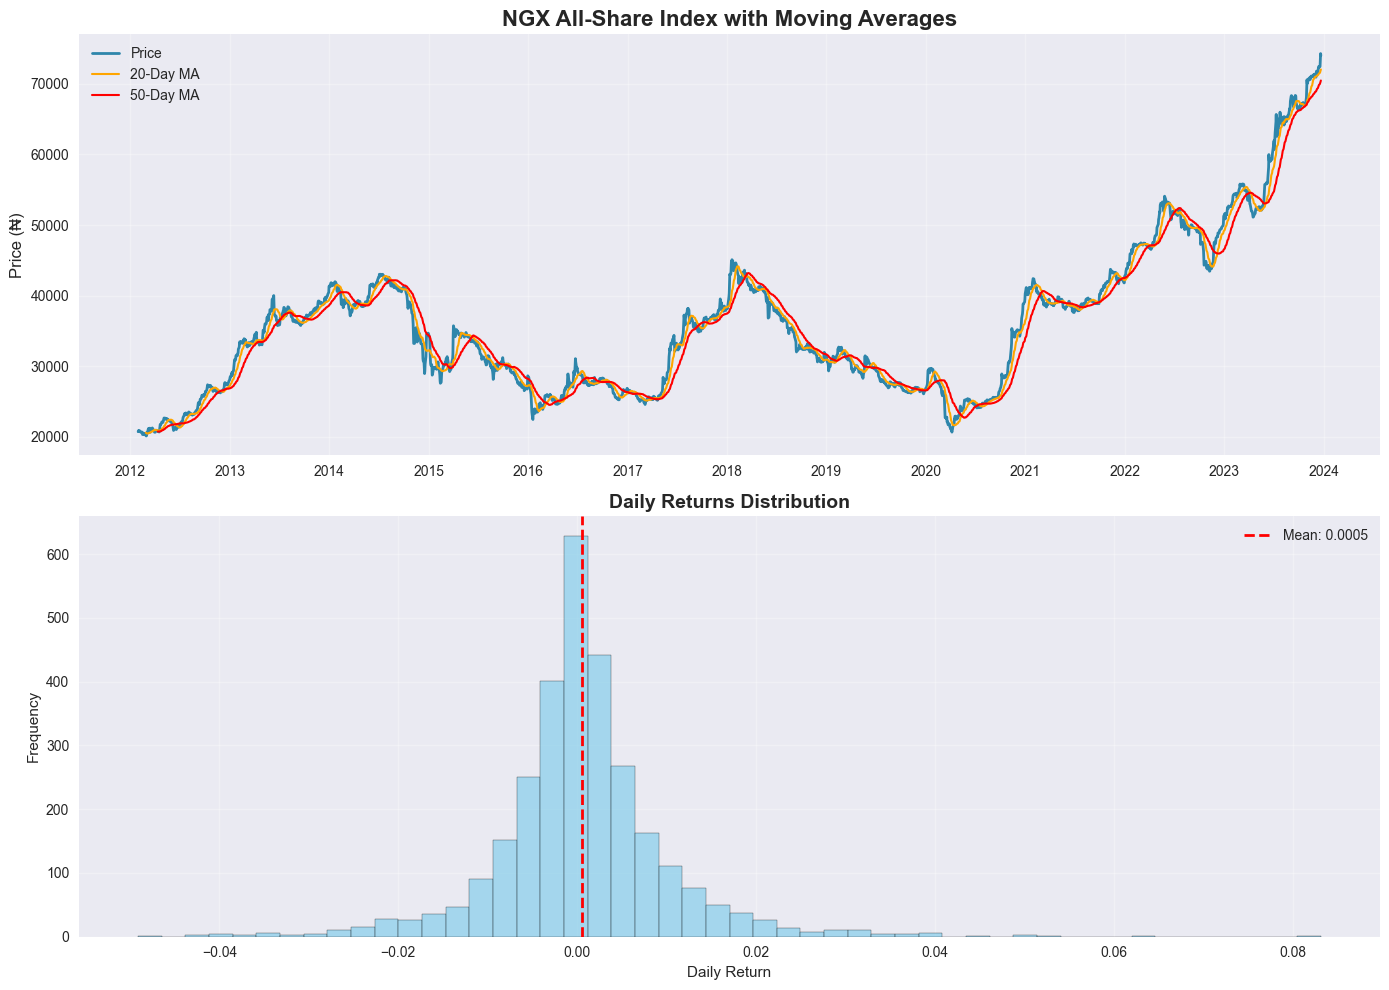

In [ ]:
# Add technical indicators and create enhanced chart
print("🔧 Adding technical indicators...")

# Calculate moving averages
df_clean["MA_20"] = df_clean["Price"].rolling(window=20).mean()
df_clean["MA_50"] = df_clean["Price"].rolling(window=50).mean()

# Calculate daily returns
df_clean["Daily_Return"] = df_clean["Price"].pct_change()

print("✅ Technical indicators calculated!")

# Create enhanced chart
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Top subplot: Price with moving averages
ax1.plot(
    df_clean["Date"], df_clean["Price"], linewidth=2, label="Price", color="#2E86AB"
)
ax1.plot(
    df_clean["Date"],
    df_clean["MA_20"],
    linewidth=1.5,
    label="20-Day MA",
    color="orange",
)
ax1.plot(
    df_clean["Date"], df_clean["MA_50"], linewidth=1.5, label="50-Day MA", color="red"
)

ax1.set_title(
    "NGX All-Share Index with Moving Averages", fontsize=16, fontweight="bold"
)
ax1.set_ylabel("Price (₦)", fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Format x-axis
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# Bottom subplot: Daily returns
returns = df_clean["Daily_Return"].dropna()
ax2.hist(returns, bins=50, alpha=0.7, color="skyblue", edgecolor="black")
ax2.axvline(
    returns.mean(),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Mean: {returns.mean():.4f}",
)
ax2.set_title("Daily Returns Distribution", fontsize=14, fontweight="bold")
ax2.set_xlabel("Daily Return")
ax2.set_ylabel("Frequency")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Comprehensive Statistical Analysis

In [ ]:
# Cell 7: Comprehensive statistical analysis
print("📊 COMPREHENSIVE STATISTICAL ANALYSIS")
print("=" * 70)

# Basic statistics using pandas describe()
print("\n📈 PRICE DESCRIPTIVE STATISTICS:")
price_stats = df_clean["Price"].describe()
display(price_stats)

# Return statistics
if "Daily_Return" in df_clean.columns:
    returns = df_clean["Daily_Return"].dropna()
    print(f"\n📊 DAILY RETURN STATISTICS:")
    return_stats = returns.describe()
    display(return_stats)

    # Additional risk metrics
    volatility_annual = returns.std() * np.sqrt(252) * 100
    print(f"\n⚡ RISK METRICS:")
    print(f"   • Annualized Volatility: {volatility_annual:.2f}%")
    print(
        f"   • Sharpe Ratio (assuming 0 risk-free): {(returns.mean()/returns.std() * np.sqrt(252)):.3f}"
    )

# Volume analysis if available
if "Volume" in df_clean.columns:
    print(f"\n📦 VOLUME ANALYSIS:")
    print(f"   • Average Daily Volume: {df_clean['Volume'].mean():,.0f}")
    print(f"   • Highest Volume: {df_clean['Volume'].max():,.0f}")
    print(f"   • Lowest Volume: {df_clean['Volume'].min():,.0f}")

print("\n" + "=" * 70)

📊 COMPREHENSIVE STATISTICAL ANALYSIS

📈 PRICE DESCRIPTIVE STATISTICS:


count     2948.000000
mean     35927.630332
std      10715.496922
min      20123.510000
25%      27543.267500
50%      34246.785000
75%      40869.792500
max      74289.020000
Name: Price, dtype: float64


📊 DAILY RETURN STATISTICS:


count    2947.000000
mean        0.000478
std         0.009610
min        -0.049084
25%        -0.003620
50%         0.000100
75%         0.004369
max         0.083123
Name: Daily_Return, dtype: float64


⚡ RISK METRICS:
   • Annualized Volatility: 15.26%
   • Sharpe Ratio (assuming 0 risk-free): 0.790

📦 VOLUME ANALYSIS:
   • Average Daily Volume: 341,997,686
   • Highest Volume: 5,440,000,000
   • Lowest Volume: 51,880,000



# Create Correlation Heatmap (If Multiple Columns)

🔗 CORRELATION ANALYSIS


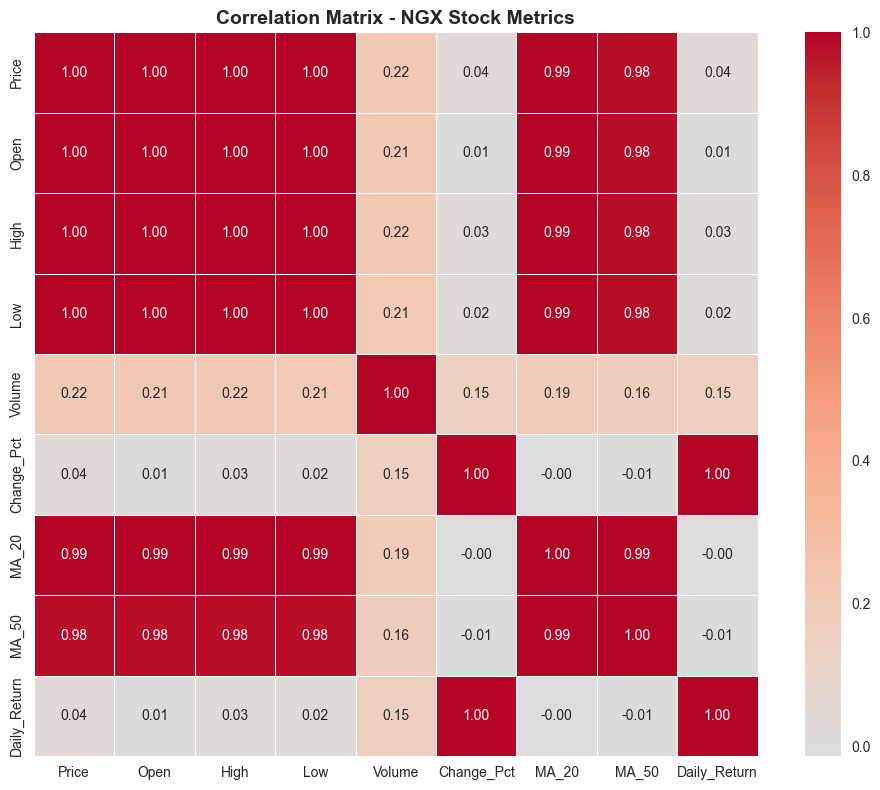

✅ Correlation heatmap created!


In [ ]:
# Correlation analysis (if you have multiple numeric columns)
print("🔗 CORRELATION ANALYSIS")

# Select only numeric columns for correlation
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns

if len(numeric_columns) > 1:
    # Calculate correlation matrix
    correlation_matrix = df_clean[numeric_columns].corr()

    # Create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap="coolwarm",
        center=0,
        square=True,
        linewidths=0.5,
        fmt=".2f",
    )

    plt.title("Correlation Matrix - NGX Stock Metrics", fontsize=14, fontweight="bold")
    plt.tight_layout()
    plt.show()

    print("✅ Correlation heatmap created!")
else:
    print("ℹ️  Not enough numeric columns for correlation analysis")

# Save Your Analysis

💾 Cleaned data saved as 'ngx_cleaned_data.csv'


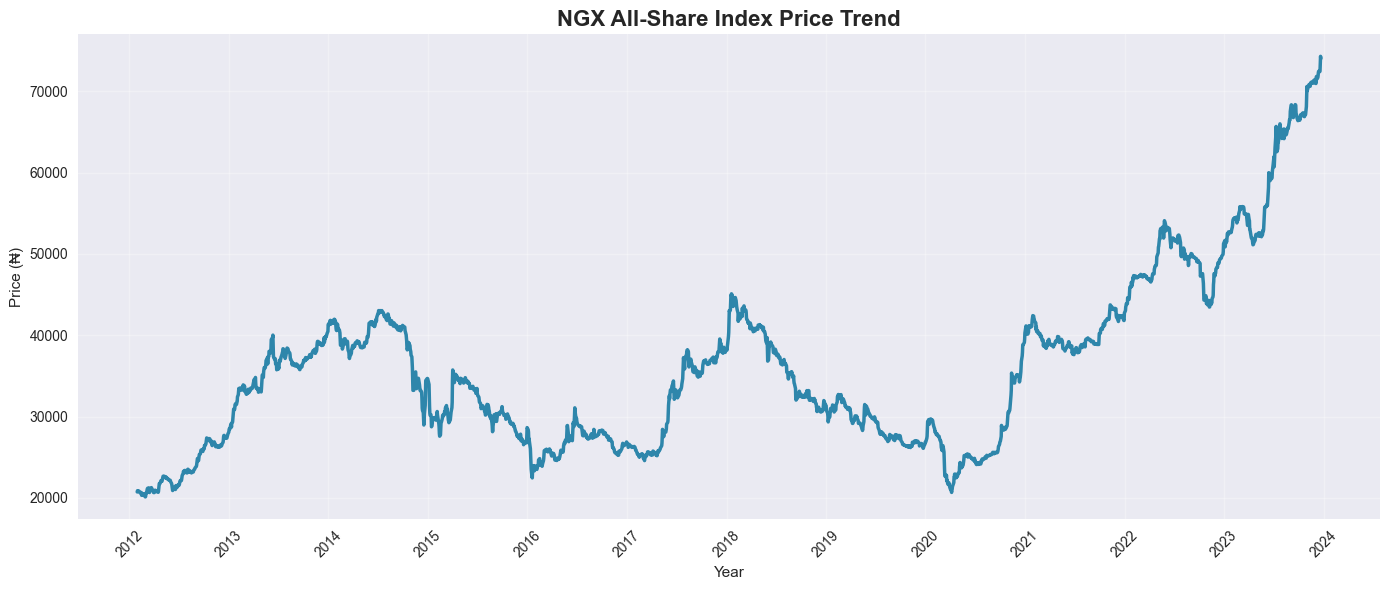

🖼️  Chart saved as 'ngx_price_trend.png'


In [ ]:
# Save your cleaned data and analysis
# Save cleaned data to new CSV
# df_clean.to_csv('ngx_cleaned_data.csv', index=False)
print("💾 Cleaned data saved as 'ngx_cleaned_data.csv'")

# Save the main chart
plt.figure(figsize=(14, 6))
plt.plot(df_clean["Date"], df_clean["Price"], linewidth=2.5, color="#2E86AB")
plt.title("NGX All-Share Index Price Trend", fontsize=16, fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Price (₦)")
plt.grid(True, alpha=0.3)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("ngx_price_trend.png", dpi=300, bbox_inches="tight")
plt.show()

print("🖼️  Chart saved as 'ngx_price_trend.png'")